# The data

In [1]:
cities = ["Mexico City", "Johannesburg", "Berlin", "Tokyo", "Sydney", "New York", "San Francisco", "Vancouver", "Hong Kong", "London"]
apartment_prices = [85833, 69364, 313577, 605761, 590726, 606726, 718870, 435518, 1387130, 857473]
toast_number = [3123, 3964, 6968, 11538, 11815, 12135, 15975, 17421, 19816, 24499]
toast_prices = [5.5, 3.5, 9, 10.5, 10, 10, 9, 5, 14, 7]
years = [9, 11, 19, 32, 32, 33, 44, 48, 54, 67]

## 1st visualization - Avocado

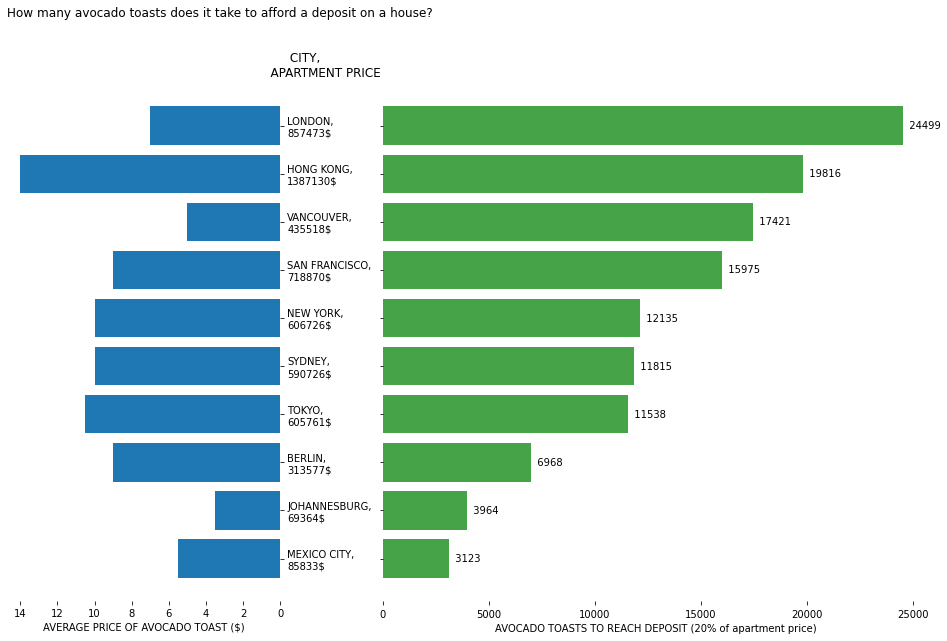

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9), ncols=2, sharey=True, gridspec_kw={'width_ratios': [1, 2]})

# city names and apartment prices go together
cities_and_prices = []
for i in range(len(cities)):
    cities_and_prices.append(cities[i].upper() + ',\n' + str(apartment_prices[i]) + '$')

########### ax 0
# go right direction
ax[0].yaxis.tick_right()
ax[0].invert_xaxis()

# add data
ax[0].barh(cities_and_prices, toast_prices)

# remove axes spines
for s in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[s].set_visible(False)

# final touches (fully professional y-label description)
ax[0].set_title("How many avocado toasts does it take to afford a deposit on a house?\n\n\n" +
                "                                                                         CITY,\n" +
                "                                                                    APARTMENT PRICE", loc='left')
ax[0].set_xlabel("AVERAGE PRICE OF AVOCADO TOAST ($)")

########### ax 1
# add data
ax[1].barh(cities_and_prices, toast_number, color=(0.2, 0.6, 0.2, 0.9))

# remove axes spines
for s in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[s].set_visible(False)

# paddings
ax[1].xaxis.set_tick_params(pad = 5)
ax[1].yaxis.set_tick_params(pad = 10)

# annotate value at end of bar
for i in ax[1].patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, "  " + str(round((i.get_width()), 2)), ha="left", va="top")

# final touches
ax[1].set_xlabel("AVOCADO TOASTS TO REACH DEPOSIT (20% of apartment price)")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.4)

# profit
plt.show()

## 2nd visualization - Year line variants

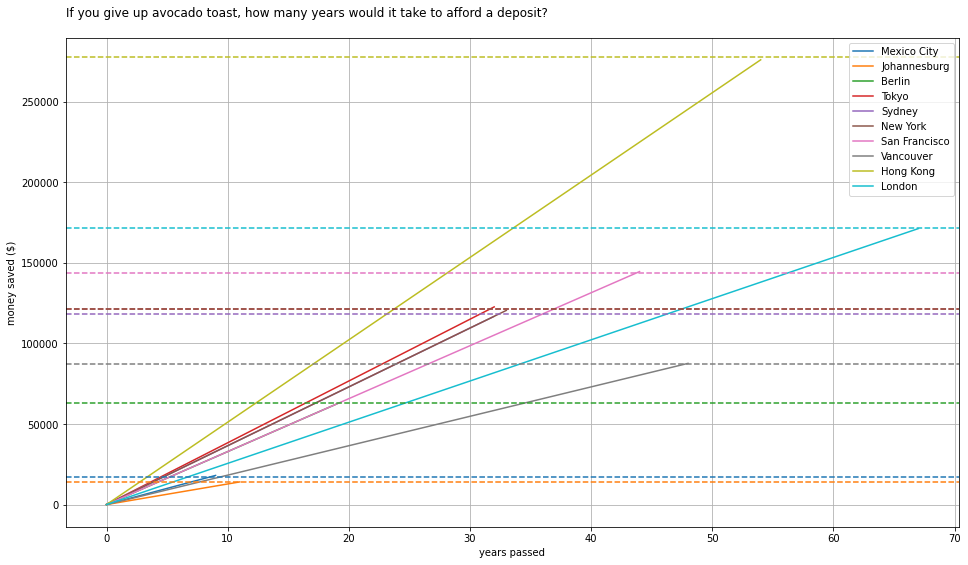

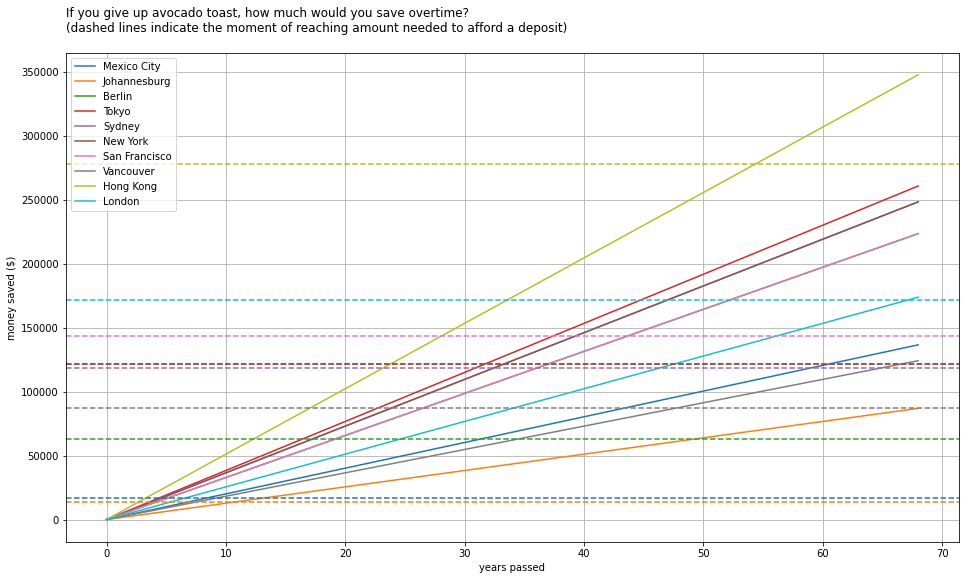

In [3]:
import matplotlib.pyplot as plt

def per_year(x: list, multiplier: float):
    result = []
    for j in range(len(x)):
        result.append(365 * x[j] * multiplier)
    return result

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

# end
plt.figure(figsize=(16,9))
x_years = [x for x in range(0, 69)]
for i in range(len(cities)):
    expex = [x for x in range(0, years[i] + 1)]
    plt.plot(expex, per_year(expex, toast_prices[i]), label=cities[i], color=colors[i])

for i in range(len(apartment_prices)):
    plt.axhline(0.2 * apartment_prices[i], linestyle='--', color=colors[i], alpha=1.0)

plt.grid()
plt.legend()
plt.title("If you give up avocado toast, how many years would it take to afford a deposit?\n", loc="left")
plt.xlabel("years passed")
plt.ylabel("money saved ($)")
plt.show()

# no end
plt.figure(figsize=(16,9))
x_years = [x for x in range(0, 69)]
for i in range(len(cities)):
    plt.plot(x_years, per_year(x_years, toast_prices[i]), label=cities[i], color=colors[i])

for i in range(len(apartment_prices)):
    plt.axhline(0.2 * apartment_prices[i], linestyle='--', color=colors[i], alpha=1.0)

plt.grid()
plt.legend()
plt.title("If you give up avocado toast, how much would you save overtime?\n" + 
          "(dashed lines indicate the moment of reaching amount needed to afford a deposit)\n", loc="left")
plt.xlabel("years passed")
plt.ylabel("money saved ($)")
plt.show()